The goal of this notebook is to break down our modeling and simulations for the rotational freebody dynamics of a hexagonal prism

In [1]:
#These imports are just the other .py files that you can find 
#in this hex-sim folder
from form_matrix import Hexagonal_Prism
from evolve_rotation import Run_Rotation
from animate_hex import Animate_Hex
import numpy as np



The first step in our simulation is deciding on a moment of inertia matrix that describes our system. In order to observe the tennis racket effect, we require that one principle axis has an intermediate value between the other two, thus for a hexagonal prism we must introduce an asymmetry in the mass distribution.

The following code sets up some parameters to numerically integrate contributions to the moment of inertia of the hexagonal prism, which is the final output that we print below.

In [2]:
# Parameters
a = 2.5e-6  # Side length of the hexagon
l = 0.27e-6  # Thickness of the prism
rho_0 = 3800  # Uniform density
n_theta = 100  # Angular resolution
n_r = 100  # Radial resolution
n_z = 50  # Z resolution

#Define a function for the mass distribution
def rho(x, y):
    return rho_0 * (1 + 0.05 * x + 0.05 * y)

prism = Hexagonal_Prism(a, rho, l, rho_0, n_theta, n_r, n_z) #Initialize moment of inertia calculation
matrix, _, __, ___ = prism.form_matrix() #Output moment of inertia matrix
print(matrix)

[[3.70360900e-26 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.70822828e-26 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 7.38510951e-26]]


The following are "sanity checks" calculating unperturbed moment of inertia tensors.

In [3]:
#This gives the moment of inertia tensor of a uniform 
#disk of the same dimensions
M = rho_0*2*np.pi*l*a**2

matrix_disk = np.array([
    [0.25*M*a**2 + 0.333*M*l**2, 0, 0],
    [0, 0.25*M*a**2 + 0.333*M*l**2, 0],
    [0, 0, 0.5*M*a**2]
])
print(matrix_disk)

[[6.39326620e-26 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 6.39326620e-26 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.25909143e-25]]


In [4]:
#This gives the moment of inertia of a uniform
#hexagonal prism of the same dimensions
M = (rho_0*l*3*np.sqrt(3)*a**2)/2

matrix_uniform_hex = np.array([
[M*((5/16)*a**2+(l**2)/6), 0, 0],
[0, M*((5/16)*a**2+(l**2)/6), 0],
[0, 0, (5/8)*M*a**2]
])
print(matrix_uniform_hex)

[[3.27418032e-26 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.27418032e-26 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 6.50787645e-26]]


We'll now explore some of the features from "form_matrix.py"

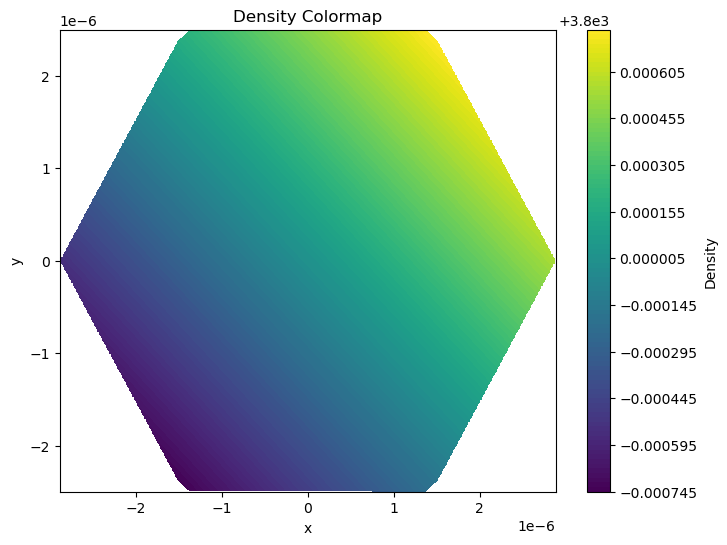

In [5]:
#This function simply plots the given function "rho" on a hexagon
#of the given dimensions
prism.density_colormap()

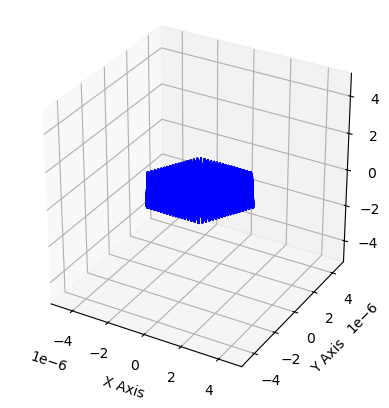

In [6]:
#This function lets you see the points that our numerical integration
#takes to "form" the hexagon
prism.hexagon_scatter()

Now, if we wish to simulate the freebody dynamics of our newly calculated hexagonal prism, we'll call on "animate_hex.py"

In [7]:
w = np.array([0.1, 10, 1]) #The initial angular velocity vector
dt = 0.000005 #The timestep of each integration
steps = 5000000 #The number of steps our integration takes

#The integration time would then be given as dt*steps

matrix = matrix #This we defined earlier

#To start our run, we pass those parameters into "Run_Rotation"
run = Run_Rotation(I = matrix, w = w, dt = dt, steps = steps, path = 'test')
#To actually compute our "run," use the run function, being sure to
#set save to true so we can view our data later if we wish
df = run.run(save = True)


c:\Users\maddo\HexSimGit\Hexagon-Simulation\HexSim\evolve_rotation.py:153: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(self.out+'\\len_'+str(self.steps)+'.png')
c:\Users\maddo\anaconda3\envs\CIERAREU\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


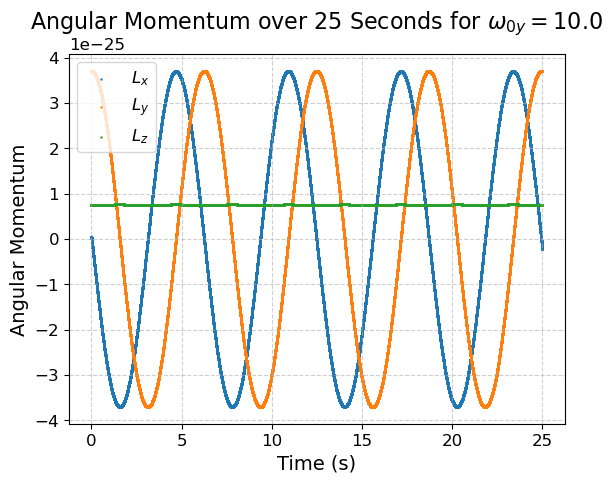

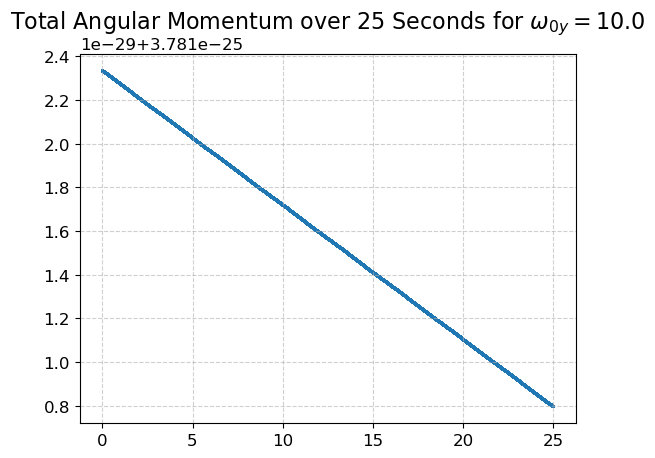

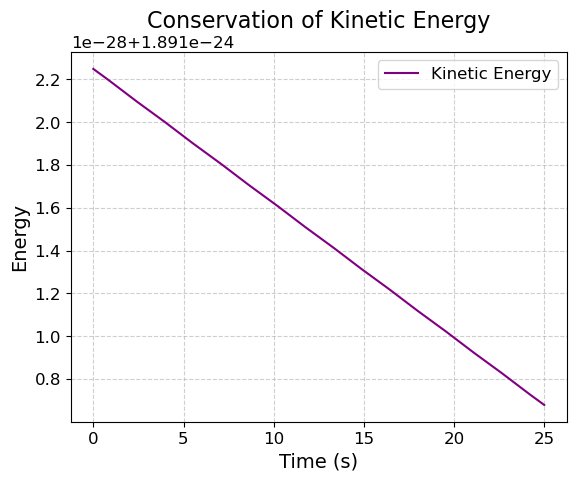

In [8]:
#We may wish to view various values over the course of a run, 
#in particular, the angular momentum and energy give us a good idea
#of if the run makes physical sense. Plotting each component of L also
#tells us about the actual dynamics of the system over time
run.plot_L(total = True, save = True)
run.plot_energy(save = True)

#Notice that our Runge-Kutta method tends to lose energy over time
#You may improve this by decreasing the step size or decreasing
#the initial angular velocity

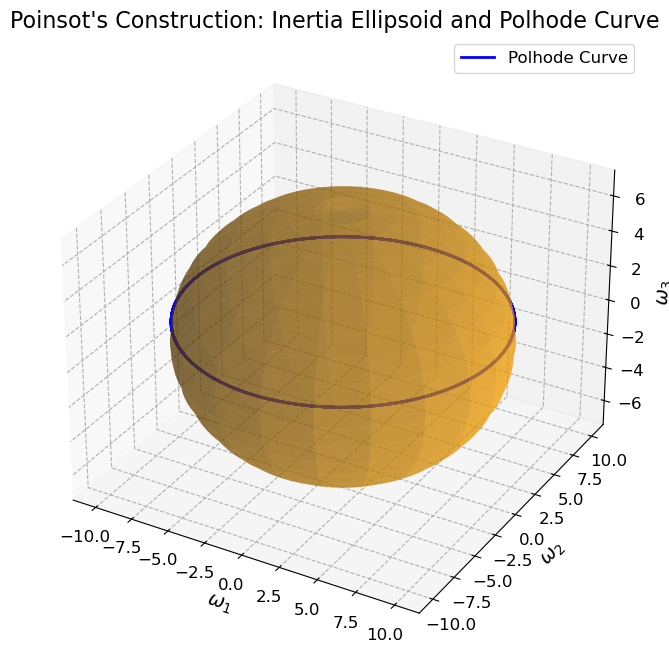

In [9]:
#Using Poincare's construction, we can get an idea of the parameter
#space that the angular momentum vector is exploring
run.plot_poinsot(save = True)

#This isn't very interesting for this system and these initial
#conditions though

The following is modelling for the dynamics of a t-bar similar to the well known space station video.

In [1]:
# Moments of inertia
cross_mass = 4.0
cross_radius = 1.0
perp_mass = 1.0
perp_length = 3.0
q = -(perp_length / 6 + cross_radius / 3)  # Distance between centers of mass

Ixx = (1 / 2) * cross_mass * cross_radius**2 + cross_mass * q**2 + \
      (perp_mass / 4) * cross_radius**2 + (perp_mass / 12) * perp_length**2 + \
      perp_mass * (perp_length / 2 + cross_radius - q)
Iyy = (1 / 4) * cross_mass * cross_radius**2 + (1 / 12) * cross_mass * perp_length**2 + \
      cross_mass * q**2 + (1 / 4) * perp_mass * cross_radius**2 + \
      (1 / 12) * perp_mass * perp_length**2 + perp_mass * (perp_length / 2 + cross_radius - q)
Izz = (1 / 2) * perp_mass * cross_radius**2 + (1 / 4) * cross_mass * cross_radius**2 + \
      (1 / 12) * cross_mass * perp_length**2

matrix = ([Ixx, 0, 0],
          [0, Iyy, 0],
          [0, 0, Izz])

In [6]:
print(matrix)

([9.11111111111111, 0, 0], [0, 11.11111111111111, 0], [0, 0, 4.5])


c:\Users\maddo\HexSimGit\Hexagon-Simulation\HexSim\evolve_rotation.py:153: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(self.out+'\\len_'+str(self.steps)+'.png')
c:\Users\maddo\anaconda3\envs\CIERAREU\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


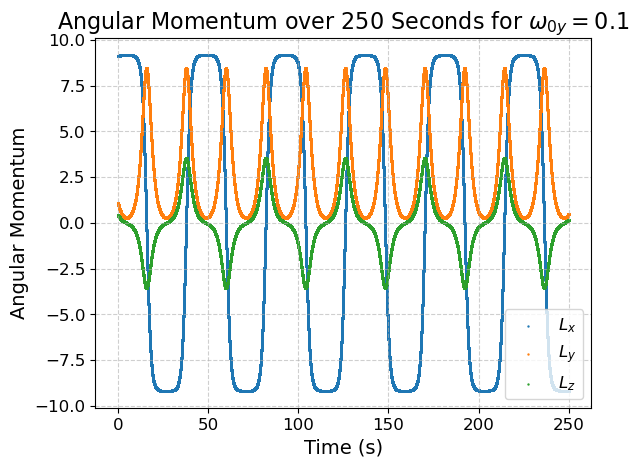

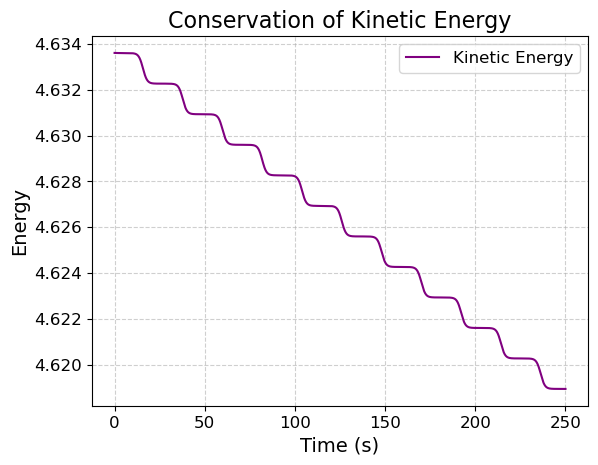

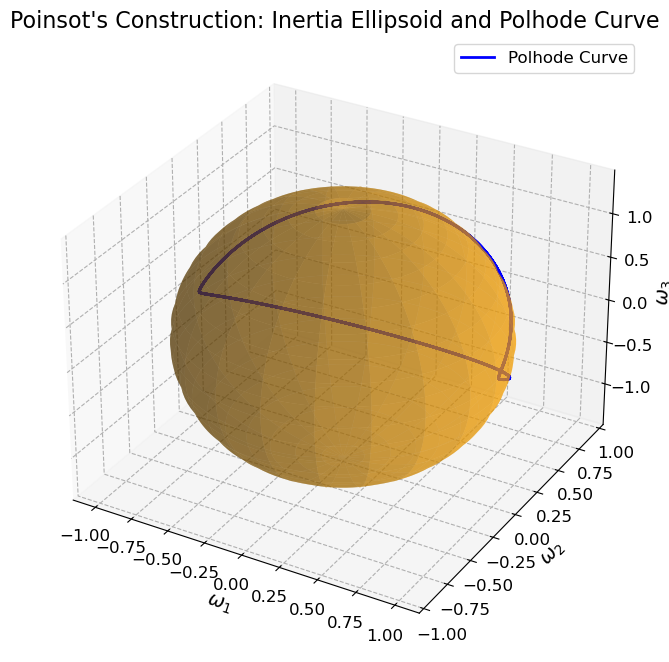

In [8]:
import numpy as np
w = np.array([1, .1, .1])
dt = 0.0005
steps = 500000

run = Run_Rotation(matrix, w = w, dt = dt, steps = steps, path = 't_bar')

run.run(save = True)
run.plot_L(save = True)
run.plot_energy(save = True)
run.plot_poinsot(save = True)



In [19]:


print(run.update_omega().type)

TypeError: Run_Rotation.find_w_dot() takes 1 positional argument but 2 were given